<a href="https://colab.research.google.com/github/adkprakash/Object_detection/blob/main/Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing kaggle
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prakashadhikari","key":"bdc8fc0fbf5355f7747315615eb5f354"}'}

In [3]:
# Creating a kaggle folder
!mkdir ~/.kaggle

In [4]:
#Copying the jason.kaggle to the folder that is created
! cp kaggle.json ~/.kaggle/

In [5]:
#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# to list all the dataset in kaggle
! kaggle datasets list

ref                                                                   title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023                          Global Country Information Dataset 2023             23KB  2023-07-08 20:37:33          11716        470  1.0              
nelgiriyewithana/global-youtube-statistics-2023                       Global YouTube Statistics 2023                      60KB  2023-07-28 15:36:38           3753        136  1.0              
joebeachcapital/global-earth-temperatures                             Global Earth Temperatures                           33KB  2023-08-09 06:21:51            791         29  1.0              
arnavsmayan/netflix-userbase-datase

In [7]:
! kaggle competitions download -c open-images-object-detection-rvc-2020

100% 9.68G/9.69G [01:33<00:00, 166MB/s]
100% 9.69G/9.69G [01:33<00:00, 112MB/s]


In [8]:
 #unzippinf the file
 ! unzip open-images-object-detection-rvc-2020.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/f27f8961c9fdd8b6.jpg  
  inflating: test/f27ffa67b2ea84dc.jpg  
  inflating: test/f280ca14282a1ad6.jpg  
  inflating: test/f28182db52c53b0d.jpg  
  inflating: test/f2818852ca1ff77d.jpg  
  inflating: test/f282105757205af4.jpg  
  inflating: test/f2822ffc5af5c0c0.jpg  
  inflating: test/f2829e5502c1b1ca.jpg  
  inflating: test/f283cd6d36165038.jpg  
  inflating: test/f2843d4485664d4f.jpg  
  inflating: test/f284a5d7bc326dcd.jpg  
  inflating: test/f284e248a903bb71.jpg  
  inflating: test/f284f43a253b84db.jpg  
  inflating: test/f2851d20a51b93b4.jpg  
  inflating: test/f2857264acde94b8.jpg  
  inflating: test/f28726ddd19c7725.jpg  
  inflating: test/f2878ab783680d8a.jpg  
  inflating: test/f287ae2756e4a78a.jpg  
  inflating: test/f288792f7c1dc75d.jpg  
  inflating: test/f288fed09bcc3b1e.jpg  
  inflating: test/f2895813921a1780.jpg  
  inflating: test/f289652bcd591602.jpg  
  inflating: test/f289f54b67090591.jpg  
  infl

In [9]:
#Cloning TFOD 2.0
! git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 87135, done.
remote: Counting objects: 100% (889/889), done.
remote: Compressing objects: 100% (409/409), done.
remote: Total 87135 (delta 530), reused 800 (delta 472), pack-reused 86246
Receiving objects: 100% (87135/87135), 599.13 MiB | 29.44 MiB/s, done.
Resolving deltas: 100% (62412/62412), done.


In [10]:
pwd

'/content'

In [11]:
cd /content/models/research

/content/models/research


In [12]:
!protoc object_detection/protos/*.proto --python_out=.

In [13]:
#COCO API
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 24.30 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [14]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [15]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-cpython-310
creating build/temp.linux-x86_64-cpython-310/pycocotools
x86_64-linux-gnu-gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/lib/python3.10/dist-packages/numpy/core/include -I../common -I/usr/include/python3.10 -c ../common/maskApi.c -o build/temp.linux-x86_64-cpython-310/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskAp

In [16]:
cp -r pycocotools /content/models/research

#Installing object detection API

In [17]:
pwd

'/content/models/research/cocoapi/PythonAPI'

In [18]:
cd ..

/content/models/research/cocoapi


In [19]:
cd ..

/content/models/research


In [20]:
cp object_detection/packages/tf2/setup.py .

In [21]:
!python -m pip install .

Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 94.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.6/28.6 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 29.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 75.9 MB/s eta 0:00:0

In [ ]:
# From within TensorFlow/models/research/
!python object_detection/builders/model_builder_tf2_test.py

2023-08-03 17:24:09.101645: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 17:24:10.393042: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-03 17:24:14.662978: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-03 17:24:15.157597: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

In [37]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import cv2

In [43]:
path='/content/test'
data = pathlib.Path(path)
img_test = list(data.glob('*.jpg'))
len(img_test)

99999

In [44]:
type(img_test)

list

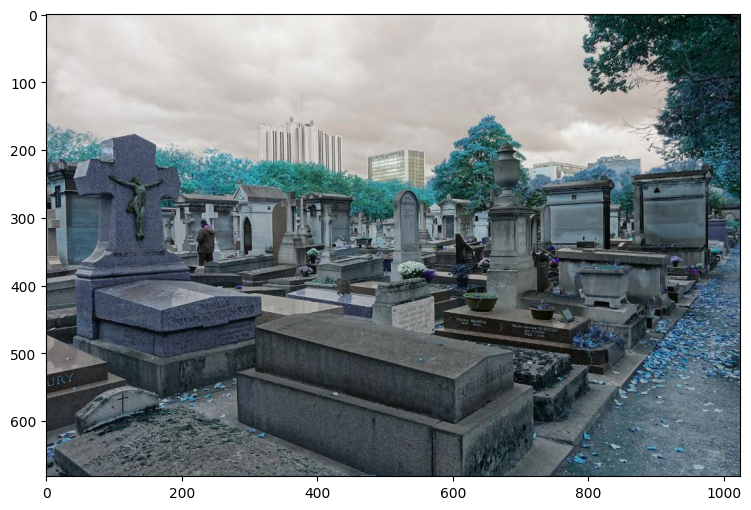

In [47]:
img_arr=cv2.imread(os.path.join(path,img_test[0]))
plt.figure(figsize=(10,6))
plt.imshow(img_arr)

In [49]:
img_arr.shape

(682, 1024, 3)

In [50]:
img_arr=cv2.imread(os.path.join(path,img_test[1]))
img_arr.shape

(768, 1024, 3)